# Machine Learning - Regression Metrics

## Import Libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression

## Import Data

In [68]:
def create_data(n_samples=1000):
    # Generate random values and noise
    x = np.random.randn(n_samples, 1)
    q = np.random.randn(n_samples, 1)*np.random.randn()
    Y = 2*x+ q
    return x, Y

In [69]:
%%time

X_train, y_train = create_data(n_samples=100)
X_test, y_test = create_data(n_samples=25)

CPU times: user 89 µs, sys: 16 µs, total: 105 µs
Wall time: 101 µs


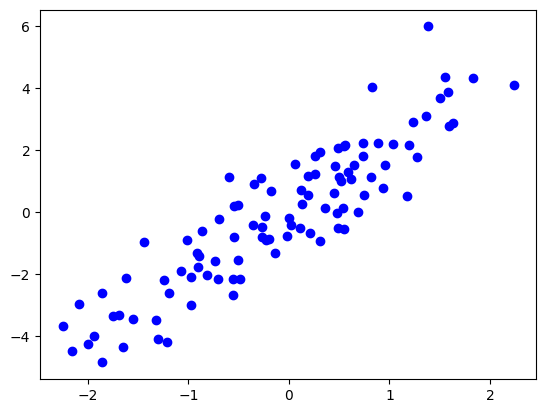

In [70]:
plt.scatter(X_train, y_train, c='b')
plt.show()

## Model Training

In [71]:
def train_and_plot(clf, X_train, y_train):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  plt.scatter(X_train, y_train, color = 'lightcoral')
  plt.plot(X_train, y_pred, color = 'firebrick')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend(['real', 'prediction'], loc='best', facecolor='white')
  plt.box(False)
  plt.show()

In [72]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

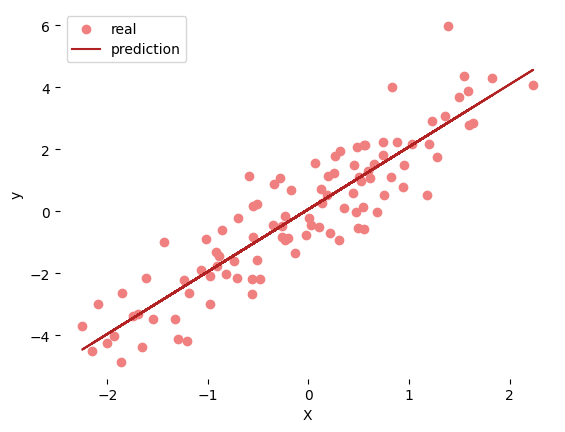

In [73]:
reg = LinearRegression()
train_and_plot(clf=reg, X_train=X_train, y_train=y_train)

## Regression Metrics

### MSE - Mean Squared Error

This metric is vulnerable to outliers.

In [74]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean(np.abs(np.array(y_pred) - np.array(y_true))**2, axis=0)
    return mse

mean_squared_error(y_test, y_pred)

array([1.84564115])

### MAE - Mean Absolute Error

More robust to outliers when compared to MSE, still suffers outliers.

In [75]:
def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(np.array(y_pred) - np.array(y_true)), axis=0)
    return mae

mean_absolute_error(y_test, y_pred)

array([1.13967627])

### MdAE - Median Absolute Error

Not influenced by outliers.

In [76]:
def median_absolute_error(y_true, y_pred):
    mdae = np.median(np.abs(np.array(y_pred) - np.array(y_true)), axis=0)
    return mdae

median_absolute_error(y_test, y_pred)

array([1.03501607])

### ACPER - Almost Correct Predictions Error Rate

Count of the predicted values that are 'th'% distant from the real values

In [77]:
def acper(y_true, y_pred, th = 0.3):
    for yt, yp in zip(y_true, y_pred):
        lower_bound = yt - (th * yt)
        upper_bound = yt + (th * yt)
        if (yp >= lower_bound) & (yp <= upper_bound):
          yield True
        else:
          yield False
          

list(acper(y_test, y_pred))

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False]

### MAPE - Mean Absolute Percentage Error

It suffers the presence of outliers.

In [78]:
def mean_absolute_percentage_error(y_true, y_pred):
    mape = np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)
    return mape
    
mean_absolute_percentage_error(y_test, y_pred)

array([-148.64328145])

### RMSE - Root Mean Square Error

Normalized distance between the vector of predicted values and the vector of observed values.

In [79]:
def root_mean_squared_error(y_true, y_pred):
    rmse = np.sqrt(np.mean(np.abs(np.array(y_pred) - np.array(y_true))**2, axis=0))
    return rmse

root_mean_squared_error(y_test, y_pred)

array([1.35854376])